In [6]:
pip install datascience geopandas geohash2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15554 sha256=1be8b9596c5dd25d328a07aeb97995152ebcb89107982b1aceb75a00c8f9ec71
  Stored in directory: c:\users\202973\appdata\local\pip\cache\wheels\97\82\cd\50d2f4984c45d96c316d77f799a099fdb6be3ad355297af3c5
Successfully built geohash2
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Traffic & Air Quality Analysis Using datascience + GeoPandas + DBSCAN + Geohashing

# STEP 1: Import libraries
# ----------------------------------------
# Import all necessary libraries for data handling, spatial analysis, plotting, and clustering
from datascience import Table
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import geohash2
import glob

In [12]:
%matplotlib inline


In [13]:
# STEP 2: Load and combine AIR QUALITY data from multiple CSVs
# ----------------------------------------
# Combine all air quality data parts into one DataFrame
files = sorted(glob.glob("chicago_eclipse_data_part_*.csv"))
aq_df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
print(aq_df.columns)

Index(['City', 'DeviceId', 'LocationName', 'Latitude', 'Longitude',
       'ReadingDateTimeUTC', 'PM25', 'CalibratedPM25', 'CalibratedO3',
       'CalibratedNO2', 'CO', 'Temperature', 'Humidity', 'BatteryLevel',
       'PercentBattery', 'CellSignal'],
      dtype='object')


In [14]:
df_subset = aq_df[['Latitude', 'Longitude', 'CalibratedPM25']]
print(df_subset.columns)
df_subset

Index(['Latitude', 'Longitude', 'CalibratedPM25'], dtype='object')


,Latitude,Longitude,CalibratedPM25
0,41.794921,-87.625857,NaN
1,41.794921,-87.625857,NaN
2,41.794921,-87.625857,NaN
3,41.794921,-87.625857,NaN
4,41.794921,-87.625857,NaN
...,...,...,...
2461084,41.903627,-87.643443,15.85
2461085,41.903627,-87.643443,14.20
2461086,41.903627,-87.643443,14.78
2461087,41.903627,-87.643443,15.47


In [15]:
# Drop rows with missing or zero values
df_subset = df_subset.dropna()
df_subset = df_subset[df_subset['CalibratedPM25'] > 0]
df_subset

,Latitude,Longitude,CalibratedPM25
24198,41.794921,-87.625857,7.01
24199,41.794921,-87.625857,7.35
24200,41.794921,-87.625857,9.26
24201,41.794921,-87.625857,8.46
24202,41.794921,-87.625857,9.91
...,...,...,...
2461084,41.903627,-87.643443,15.85
2461085,41.903627,-87.643443,14.20
2461086,41.903627,-87.643443,14.78
2461087,41.903627,-87.643443,15.47


In [16]:
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(df_subset[['Latitude', 'Longitude', 'CalibratedPM25']])


In [17]:
db = DBSCAN(eps=0.5, min_samples=10)  # Adjust eps and min_samples as needed
labels = db.fit_predict(coords_scaled)
df_subset['cluster'] = labels


MemoryError: 

In [ ]:
aq_df = aq_df.drop(columns=[
    "City",
    "DeviceId",
    "LocationName",
    "Temperature",
    "Humidity",
    "BatteryLevel",
    "PercentBattery",
    "CellSignal"
])
print(aq_df.columns)

In [59]:
aq_df

,Latitude,Longitude,ReadingDateTimeUTC,PM25,CalibratedPM25,CalibratedO3,CalibratedNO2,CO,geohash
24198,41.794921,-87.625857,2021-06-30 00:01:33+00:00,0.870864,7.01,25.86,2.83,0.215033,dp3ty08c1
24199,41.794921,-87.625857,2021-06-30 00:06:43+00:00,1.512727,7.35,25.62,3.29,0.224233,dp3ty08c1
24200,41.794921,-87.625857,2021-06-30 00:11:53+00:00,3.797307,9.26,26.26,3.51,0.246595,dp3ty08c1
24201,41.794921,-87.625857,2021-06-30 00:17:03+00:00,2.158962,8.46,25.32,7.05,0.313020,dp3ty08c1
24202,41.794921,-87.625857,2021-06-30 00:22:13+00:00,3.170227,9.91,24.79,6.69,0.328050,dp3ty08c1
...,...,...,...,...,...,...,...,...,...
2461084,41.903627,-87.643443,2021-08-20 11:55:10+00:00,17.235613,15.85,22.52,13.78,0.407807,dp3wms7fr
2461085,41.903627,-87.643443,2021-08-20 12:00:20+00:00,11.742577,14.20,20.00,12.48,0.382384,dp3wms7fr
2461086,41.903627,-87.643443,2021-08-20 12:05:30+00:00,13.482563,14.78,21.90,13.01,0.385963,dp3wms7fr
2461087,41.903627,-87.643443,2021-08-20 12:10:39+00:00,10.450826,15.47,19.72,13.55,0.438555,dp3wms7fr


In [62]:
# Convert timestamp to datetime format
aq_df["ReadingDateTimeUTC"] = pd.to_datetime(aq_df["ReadingDateTimeUTC"], utc=True)

In [63]:
# STEP 3: Load TAXI data
# ----------------------------------------
# Load taxi trip data from a single file
taxi_df = pd.read_csv("taxi_data.csv")

# Keep only relevant columns
columns_to_keep = [
    "Trip Start Timestamp",
    "Trip End Timestamp",
    "Trip Seconds",
    "Trip Miles",
    "Pickup Centroid Latitude",
    "Pickup Centroid Longitude"
]

taxi_df = taxi_df[columns_to_keep]

print(taxi_df.columns)

Index(['Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude'],
      dtype='object')


In [58]:
taxi_df

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Centroid Latitude,Pickup Centroid Longitude,geohash
0,2021-10-03 20:30:00+00:00,2021-10-03 21:00:00+00:00,1584.0,18.07,41.877406,-87.621972,dp3wnpe9s
1,2021-10-03 20:30:00+00:00,2021-10-03 21:00:00+00:00,1606.0,16.60,41.979071,-87.903040,dp3qzdncy
2,2021-10-03 20:30:00+00:00,2021-10-03 20:45:00+00:00,660.0,1.40,41.899602,-87.633308,dp3wmge6g
3,2021-10-03 20:30:00+00:00,2021-10-03 20:30:00+00:00,498.0,3.45,41.980264,-87.913625,dp3qz6r2b
4,2021-10-03 20:30:00+00:00,2021-10-03 20:45:00+00:00,618.0,0.00,41.878866,-87.625192,dp3wnpc61
...,...,...,...,...,...,...,...
2618446,2021-01-01 20:45:00+00:00,2021-01-01 21:15:00+00:00,1500.0,11.90,41.707311,-87.534903,dp3v20e48
2618447,2021-01-01 20:45:00+00:00,2021-01-01 21:00:00+00:00,807.0,4.21,41.953582,-87.723452,dp3wev3tr
2618448,2021-01-01 20:45:00+00:00,2021-01-01 21:00:00+00:00,1260.0,0.00,41.792592,-87.769615,dp3tfb057
2618449,2021-01-01 20:45:00+00:00,2021-01-01 21:15:00+00:00,1320.0,8.90,41.835118,-87.618678,dp3typy50


In [64]:
# Convert pickup and dropoff timestamps to datetime format
taxi_df["Trip Start Timestamp"] = pd.to_datetime(
    taxi_df["Trip Start Timestamp"],
    format="%m/%d/%Y  %I:%M:%S %p",
    utc=True
)
taxi_df["Trip End Timestamp"] = pd.to_datetime(
    taxi_df["Trip End Timestamp"],
    format="%m/%d/%Y  %I:%M:%S %p",
    utc=True
)

In [65]:
# Drop all rows with any NaN values in air quality data
aq_df = aq_df.dropna()
# Drop all rows with any NaN values in taxi data
taxi_df = taxi_df.dropna()


In [56]:
print("🔍 Null values in Air Quality Data:")
print(aq_df.isnull().sum())

print("🔍 Null values in Taxi Data:")
print(taxi_df.isnull().sum())

def null_report(df, name):
    print(f"🧾 Missing values in {name}:")
    nulls = df.isnull().sum()
    percent = (nulls / len(df)) * 100
    report = pd.DataFrame({"Null Count": nulls, "Percent": percent.round(2)})
    print(report[report["Null Count"] > 0])  # Show only columns with nulls
    print()

null_report(aq_df, "Air Quality Data")
null_report(taxi_df, "Taxi Data")

🔍 Null values in Air Quality Data:
Latitude              0
Longitude             0
ReadingDateTimeUTC    0
PM25                  0
CalibratedPM25        0
CalibratedO3          0
CalibratedNO2         0
CO                    0
dtype: int64
🔍 Null values in Taxi Data:
Trip Start Timestamp         0
Trip End Timestamp           0
Trip Seconds                 0
Trip Miles                   0
Pickup Centroid Latitude     0
Pickup Centroid Longitude    0
dtype: int64
🧾 Missing values in Air Quality Data:
Empty DataFrame
Columns: [Null Count, Percent]
Index: []

🧾 Missing values in Taxi Data:
Empty DataFrame
Columns: [Null Count, Percent]
Index: []



In [66]:
# Generate geohashes for air quality data
aq_df = aq_df.copy()
aq_df["geohash"] = aq_df.apply(
    lambda row: geohash2.encode(row["Latitude"], row["Longitude"], precision=8),
    axis=1
)

# Generate geohashes for taxi data
taxi_df = taxi_df.copy()
taxi_df["geohash"] = taxi_df.apply(
    lambda row: geohash2.encode(row["Pickup Centroid Latitude"], row["Pickup Centroid Longitude"], precision=8),
    axis=1
)

print("✅ Geohashes generated for both datasets.")
print("Example AQ geohashes:", aq_df["geohash"].unique()[:5])
print("Example Taxi geohashes:", taxi_df["geohash"].unique()[:5])


✅ Geohashes generated for both datasets.
Example AQ geohashes: ['dp3ty08c' 'dp3ty09h' 'dp3wh3wm' 'dp3wh6yr' 'dp3wh6yp']
Example Taxi geohashes: ['dp3wnpe9' 'dp3qzdnc' 'dp3wmge6' 'dp3qz6r2' 'dp3wnpc6']


In [67]:
# 1. Aggregate AQ data by geohash
aq_grouped = aq_df.groupby("geohash").agg({
    "CalibratedPM25": "mean",
    "CalibratedO3": "mean",
    "CalibratedNO2": "mean",
    "CO": "mean"
}).reset_index()

# 2. Aggregate Taxi data by geohash
taxi_grouped = taxi_df.groupby("geohash").agg({
    "Trip Seconds": "mean",
    "Trip Miles": "mean",
    "Trip Start Timestamp": "count"
}).reset_index().rename(columns={"Trip Start Timestamp": "trip_count"})

# 3. Join by geohash (only areas with both AQ and taxi data)
joined_summary = pd.merge(taxi_grouped, aq_grouped, on="geohash", how="inner")

# 4. Inspect features ready for clustering
print(joined_summary.head())


Empty DataFrame
Columns: [geohash, Trip Seconds, Trip Miles, trip_count, CalibratedPM25, CalibratedO3, CalibratedNO2, CO]
Index: []


In [46]:
joined_summary

,geohash,Trip Seconds,Trip Miles,trip_count,CalibratedPM25,CalibratedO3,CalibratedNO2,CO


In [22]:
total_trips = joined_summary["trip_count"].sum()
print("🧾 Total number of trips across all geohashes:", total_trips)


🧾 Total number of trips across all geohashes: 321358


In [19]:
print("Taxi geohashes:", taxi_df["geohash"].nunique())
print("AQ geohashes:", aq_df["geohash"].nunique())


Taxi geohashes: 394
AQ geohashes: 105


In [20]:
print("Joined geohashes:", joined_summary["geohash"].nunique())


Joined geohashes: 41


cluster
 0    36
-1     5
Name: count, dtype: int64


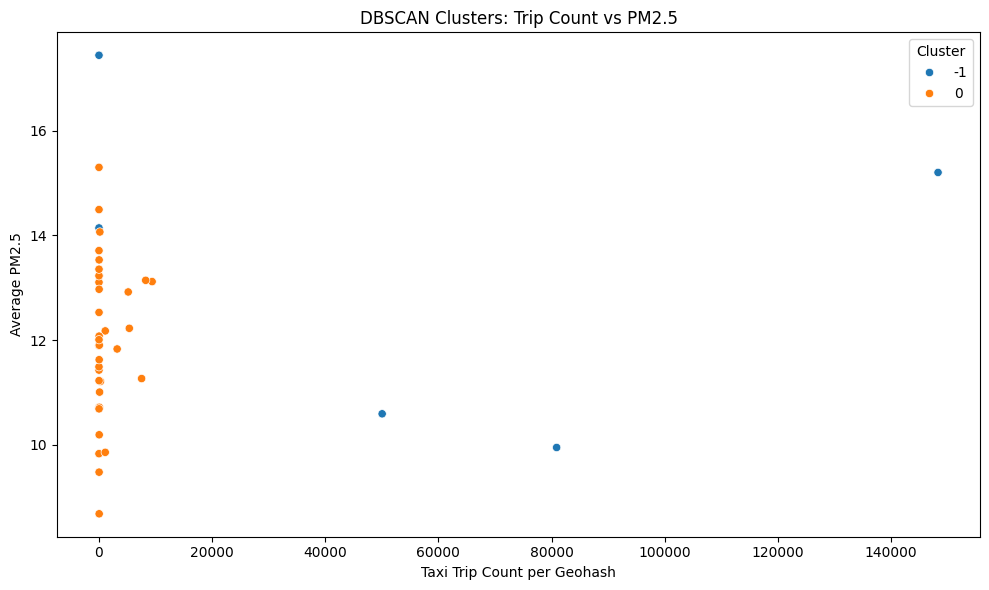

In [ ]:
# Step 1: Select relevant columns for clustering
# You can adjust features here based on what you want DBSCAN to consider
features = joined_summary[[
    "Trip Seconds",     # average trip duration
    "Trip Miles",       # average trip distance
    "trip_count",       # number of trips per geohash
    "CalibratedPM25"    # pollution value you're targeting
]]

# Step 2: Standardize features
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# Step 3: Run DBSCAN
db = DBSCAN(eps=1.0, min_samples=5)  # You can tune these values
joined_summary["cluster"] = db.fit_predict(scaled)

# Step 5: Optional - View how many geohashes in each cluster
print(joined_summary["cluster"].value_counts())

# Step 4: Visualize clusters (Trip Count vs PM2.5 as an example)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=joined_summary,
    x="trip_count",
    y="CalibratedPM25",
    hue="cluster",
    palette="tab10"
)
plt.title("DBSCAN Clusters: Trip Count vs PM2.5")
plt.xlabel("Taxi Trip Count per Geohash")
plt.ylabel("Average PM2.5")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()




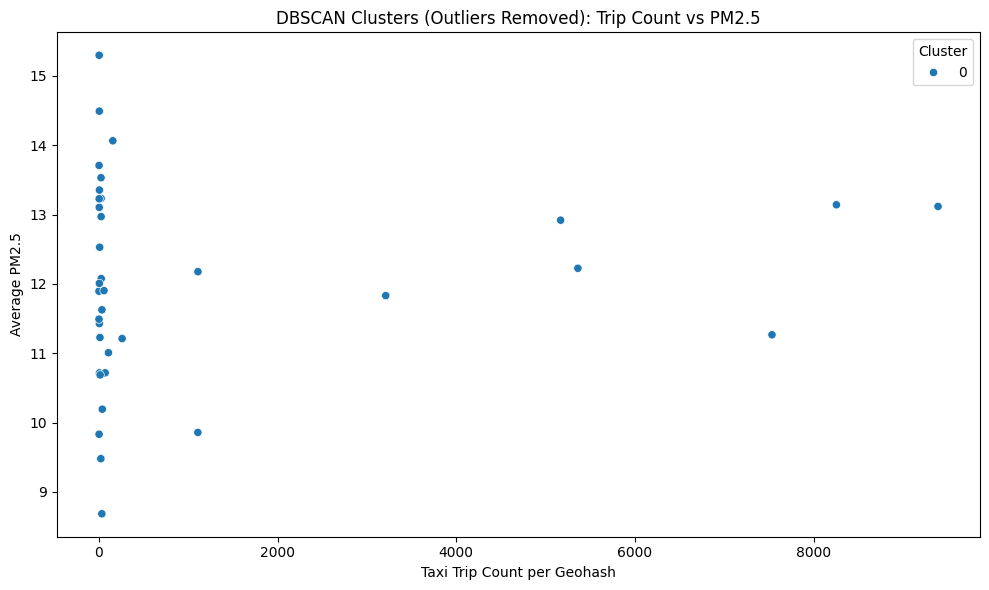

In [30]:
# Remove DBSCAN outliers (cluster -1)
cleaned = joined_summary[joined_summary["cluster"] != -1]

# Plot cleaned data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cleaned,
    x="trip_count",
    y="CalibratedPM25",
    hue="cluster",
    palette="tab10"
)
plt.title("DBSCAN Clusters (Outliers Removed): Trip Count vs PM2.5")
plt.xlabel("Taxi Trip Count per Geohash")
plt.ylabel("Average PM2.5")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
